In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from mlxtend.classifier import StackingClassifier 
import xgboost as xgb

/home/patrick/anaconda3/envs/classification/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### First Let's load our data.
Starting with the smallest dataset for simplicity

In [2]:
x = np.memmap('data/gray_data_360', mode='r', shape = (150000,360))
# x = np.load('data/gray_data_20')
y = np.memmap('data/image_target.npy', mode='r', shape = (150000,))
x_test = np.memmap('data/test_gray_data_360.npy', mode='r', shape = (50000,360))
y_test = np.memmap('data/test_target.npy', mode='r', shape = (50000))
print(x.shape)
print(y.shape)
x = pd.DataFrame(x)
y = pd.DataFrame(y)
y = y == 2
y = y.astype(int)
y_test = y_test == 2
y_test = y_test.astype(int)
x = x/255
x_test = x_test/255

(150000, 360)
(150000,)


"target_data": {
"Inco": 2, 
"Teac": 1, 
"Cons": 0, 
"Publ": 4, 
"Econ": 3}}

In [3]:
X_train, X_val, y_train, y_val = train_test_split(x, y[0], test_size=0.2, stratify=y)
print(X_train.shape)
print(y_val.shape)

(120000, 360)
(30000,)


## KNN
K nearest neighbors

~~~
Accuracy:  0.218
Precision:	0.21878291972161956
Recall:	0.21799999999999997
F1:	0.2158672632176471
array([[1658, 1364, 1110,  993,  875],
       [1541, 1545, 1138,  965,  811],
       [1557, 1340, 1286,  961,  856],
       [1567, 1341, 1192, 1059,  841],
       [1590, 1370, 1090,  958,  992]])
~~~


In [ ]:
knn = KNeighborsClassifier(n_neighbors=10, n_jobs=-1)
knn.fit(X_train, y_train)
y_pred = knn.predict(x_test,)
print(f'Accuracy:\t{accuracy_score(y_test, y_pred)}')
print(f'Precision:\t{precision_score(y_test, y_pred, average="macro")}')
print(f'Recall:\t{recall_score(y_test, y_pred, average="macro")}')
print(f'F1:\t{f1_score(y_test, y_pred, average="macro")}')
confusion_matrix(y_test, y_pred)

Accuracy:	0.77944
Precision:	0.5812030193416076
Recall:	0.5326375
F1:	0.526447277173356


array([[37759,  2241],
       [ 8787,  1213]])

## Logistic Regression

~~~
Accuracy:	0.20534
Precision:	0.20556761017314962
Recall:	0.20534
F1:	0.20329858294811992
array([[1883, 2415, 2303, 2030, 1369],
       [1716, 2481, 2369, 2067, 1367],
       [1721, 2372, 2430, 2124, 1353],
       [1661, 2522, 2348, 2085, 1384],
       [1718, 2400, 2401, 2093, 1388]])
~~~


In [5]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(x_test,)
print(f'Accuracy:\t{accuracy_score(y_test, y_pred)}')
print(f'Precision:\t{precision_score(y_test, y_pred, average="macro")}')
print(f'Recall:\t{recall_score(y_test, y_pred, average="macro")}')
print(f'F1:\t{f1_score(y_test, y_pred, average="macro")}')
confusion_matrix(y_test, y_pred)

Accuracy:	0.8041
Precision:	0.9016467516818958
Recall:	0.51025
F1:	0.4655472933489775


array([[40000,     0],
       [ 9795,   205]])

In [6]:
grid={"C":np.logspace(-3,3,7), "penalty":["l2"], "solver":['liblinear','newton-cg']}
lr=LogisticRegression()
lr_cv=GridSearchCV(lr,grid,cv=3,scoring='f1_macro')
lr_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l2'],
                         'solver': ['liblinear', 'newton-cg']},
             scoring='f1_macro')

In [7]:
res = pd.DataFrame(lr_cv.cv_results_)
res.sort_values(by='rank_test_score', ascending=True).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
8,3.875774,0.118141,0.025798,0.001195,10.0,l2,liblinear,"{'C': 10.0, 'penalty': 'l2', 'solver': 'liblin...",0.467689,0.465926,0.465295,0.466303,0.001013,1
9,4.322895,0.199139,0.025138,0.001296,10.0,l2,newton-cg,"{'C': 10.0, 'penalty': 'l2', 'solver': 'newton...",0.467689,0.465926,0.465295,0.466303,0.001013,1
10,3.855520,0.100697,0.027524,0.000378,100.0,l2,liblinear,"{'C': 100.0, 'penalty': 'l2', 'solver': 'libli...",0.467689,0.465926,0.465295,0.466303,0.001013,1
11,4.002693,0.207720,0.023015,0.000300,100.0,l2,newton-cg,"{'C': 100.0, 'penalty': 'l2', 'solver': 'newto...",0.467689,0.465926,0.465295,0.466303,0.001013,1
12,3.809236,0.010547,0.025561,0.001042,1000.0,l2,liblinear,"{'C': 1000.0, 'penalty': 'l2', 'solver': 'libl...",0.467689,0.465926,0.465295,0.466303,0.001013,1


In [ ]:
lr = LogisticRegression(C=10,penalty='l2',solver='newton-cg')
lr.fit(X_train, y_train)
y_pred = lr.predict(x_test,)
print(f'Accuracy:\t{accuracy_score(y_test, y_pred)}')
print(f'Precision:\t{precision_score(y_test, y_pred, average="macro")}')
print(f'Recall:\t{recall_score(y_test, y_pred, average="macro")}')
print(f'F1:\t{f1_score(y_test, y_pred, average="macro")}')
confusion_matrix(y_test, y_pred)

Accuracy:	0.22542
Precision:	0.2254166168175497
Recall:	0.22542
F1:	0.2253968045432373


array([[2162, 2033, 1902, 1918, 1985],
       [1840, 2305, 1941, 1966, 1948],
       [1940, 2027, 2243, 1851, 1939],
       [1917, 1954, 1948, 2247, 1934],
       [1923, 1994, 1928, 1841, 2314]])

## Decision Tree

~~~
Accuracy:	0.20046
Precision:	0.20043461791314954
Recall:	0.20046
F1:	0.20025358642806665
array([[2236, 2066, 2003, 1891, 1804],
       [2183, 2051, 1982, 1969, 1815],
       [2319, 1968, 1953, 1921, 1839],
       [2110, 2065, 2062, 1937, 1826],
       [2149, 2070, 2005, 1930, 1846]])
~~~


In [7]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(x_test,)
print(f'Accuracy:\t{accuracy_score(y_test, y_pred)}')
print(f'Precision:\t{precision_score(y_test, y_pred, average="macro")}')
print(f'Recall:\t{recall_score(y_test, y_pred, average="macro")}')
print(f'F1:\t{f1_score(y_test, y_pred, average="macro")}')
confusion_matrix(y_test, y_pred)

Accuracy:	0.66912
Precision:	0.4980389672980644
Recall:	0.497925
F1:	0.4977920285684647


array([[31330,  8670],
       [ 7874,  2126]])

In [8]:
grid={"criterion":["gini",'entropy'],'min_samples_split':[2,6,14,32,64], 'random_state':[42, None] }
dt=DecisionTreeClassifier()
dt_cv=GridSearchCV(dt,grid,cv=3,scoring='f1_macro')
dt_cv.fit(X_train, y_train)

KeyboardInterrupt: 

In [75]:
res = pd.DataFrame(dt_cv.cv_results_)
res.sort_values(by='rank_test_score', ascending=True).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_min_samples_split,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2.550681,0.081907,0.029533,0.002559,gini,2,42,"{'criterion': 'gini', 'min_samples_split': 2, ...",0.214716,0.216214,0.217456,0.216128,0.001120,1
1,2.721425,0.208265,0.032089,0.003546,gini,2,None,"{'criterion': 'gini', 'min_samples_split': 2, ...",0.217047,0.213960,0.217119,0.216042,0.001472,2
12,3.708585,0.046757,0.031218,0.002523,entropy,6,42,"{'criterion': 'entropy', 'min_samples_split': ...",0.217093,0.212089,0.218641,0.215941,0.002796,3
15,3.489973,0.109457,0.030265,0.000409,entropy,14,None,"{'criterion': 'entropy', 'min_samples_split': ...",0.214798,0.213864,0.218960,0.215874,0.002215,4
14,3.453665,0.101807,0.029545,0.002062,entropy,14,42,"{'criterion': 'entropy', 'min_samples_split': ...",0.215472,0.213849,0.218251,0.215857,0.001817,5


In [14]:
dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=8, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(x_test,)
print(f'Accuracy:\t{accuracy_score(y_test, y_pred)}')
print(f'Precision:\t{precision_score(y_test, y_pred, average="macro")}')
print(f'Recall:\t{recall_score(y_test, y_pred, average="macro")}')
print(f'F1:\t{f1_score(y_test, y_pred, average="macro")}')
confusion_matrix(y_test, y_pred)

Accuracy:	0.67754
Precision:	0.5083623778848926
Recall:	0.508775
F1:	0.5084232620732193


array([[31602,  8398],
       [ 7725,  2275]])

## Random Forest

~~~
Accuracy:	0.20516
Precision:	0.2051212463423299
Recall:	0.20515999999999995
F1:	0.20510088356551712
array([[2072, 2056, 2049, 1907, 1916],
       [2066, 2011, 2039, 1894, 1990],
       [2003, 1998, 2069, 1880, 2050],
       [1978, 2028, 2048, 1920, 2026],
       [2046, 1988, 1930, 1850, 2186]])
~~~


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(x_test,)
print(f'Accuracy:\t{accuracy_score(y_test, y_pred)}')
print(f'Precision:\t{precision_score(y_test, y_pred, average="macro")}')
print(f'Recall:\t{recall_score(y_test, y_pred, average="macro")}')
print(f'F1:\t{f1_score(y_test, y_pred, average="macro")}')
confusion_matrix(y_test, y_pred)

Accuracy:	0.80216
Precision:	0.9008658702798044
Recall:	0.5054
F1:	0.45566302479917375


array([[40000,     0],
       [ 9892,   108]])

In [12]:
rf = RandomForestClassifier(criterion='entropy', min_samples_split=8, random_state=42, max_features=40, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(x_test,)
print(f'Accuracy:\t{accuracy_score(y_test, y_pred)}')
print(f'Precision:\t{precision_score(y_test, y_pred, average="macro")}')
print(f'Recall:\t{recall_score(y_test, y_pred, average="macro")}')
print(f'F1:\t{f1_score(y_test, y_pred, average="macro")}')
confusion_matrix(y_test, y_pred)

Accuracy:	0.80238
Precision:	0.9009542711653735
Recall:	0.50595
F1:	0.45679293214521083


array([[40000,     0],
       [ 9881,   119]])

In [15]:
rf = RandomForestClassifier(min_samples_split=16, max_features=80, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(x_test,)
print(f'Accuracy:\t{accuracy_score(y_test, y_pred)}')
print(f'Precision:\t{precision_score(y_test, y_pred, average="macro")}')
print(f'Recall:\t{recall_score(y_test, y_pred, average="macro")}')
print(f'F1:\t{f1_score(y_test, y_pred, average="macro")}')
confusion_matrix(y_test, y_pred)

Accuracy:	0.80236
Precision:	0.9009462331101399
Recall:	0.5059
F1:	0.45669030937265537


array([[40000,     0],
       [ 9882,   118]])

## XGBoost

~~~
Accuracy:	0.2025
Precision:	0.2025738072573832
Recall:	0.20249999999999999
F1:	0.20229736964345638
array([[2208, 2007, 1772, 2025, 1988],
       [2150, 2057, 1745, 2094, 1954],
       [2183, 1989, 1815, 2045, 1968],
       [2207, 2052, 1764, 2063, 1914],
       [2219, 1989, 1775, 2035, 1982]])
~~~


In [13]:
gbm = xgb.XGBClassifier( 
                        n_estimators=300,
                        max_depth=10,
                        objective='binary:logistic', #new objective
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=3,
                        colsample_bytree=.5,
                        use_label_encoder=False
                       )

eval_set=[(X_train,y_train),(X_val,y_val)]
fit_model = gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='error',
                    early_stopping_rounds=50,
                    verbose=False
                   )

y_pred = gbm.predict(x_test)
print(f'Accuracy:\t{accuracy_score(y_test, y_pred)}')
print(f'Precision:\t{precision_score(y_test, y_pred, average="macro")}')
print(f'Recall:\t{recall_score(y_test, y_pred, average="macro")}')
print(f'F1:\t{f1_score(y_test, y_pred, average="macro")}')
confusion_matrix(y_test, y_pred)

/home/patrick/anaconda3/envs/classification/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Accuracy:	0.8044
Precision:	0.9017677782241864
Recall:	0.511
F1:	0.4670599451845542


array([[40000,     0],
       [ 9780,   220]])

In [121]:
# gbm = xgb.XGBClassifier(use_label_encoder=False)
# # grid={'max_depth': [2, 6, 12],'n_estimators': [50, 100, 200], 'learning_rate':[0.3,.05],
# #         'objective':['multi:softmax', 'multi:softprob'],'colsample_bytree':[0.2,0.5,0.8]}
# grid={'max_depth': [2, 12],'n_estimators': [50, 200],
#         'objective':['multi:softmax'],'colsample_bytree':[0.8]}
# gbm_cv=GridSearchCV(gbm,grid,cv=3,scoring='f1_macro', n_jobs=-1)
# gbm_cv.fit(X_train, y_train)

In [ ]:
# res = pd.DataFrame(gbm_cv.cv_results_)
# res.sort_values(by='rank_test_score', ascending=True).head(10)

In [122]:
gbm = xgb.XGBClassifier( 
                        n_estimators=200,
                        max_depth=12,
                        objective='multi:softmax', #new objective
                        learning_rate=.03, 
                        min_child_weight=3,
                        colsample_bytree=.4,
                        use_label_encoder=False
                       )

eval_set=[(X_train,y_train),(X_val,y_val)]
fit_model = gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='merror',
                    early_stopping_rounds=50,
                    verbose=False
                   )

y_pred = gbm.predict(x_test)
print(f'Accuracy:\t{accuracy_score(y_test, y_pred)}')
print(f'Precision:\t{precision_score(y_test, y_pred, average="macro")}')
print(f'Recall:\t{recall_score(y_test, y_pred, average="macro")}')
print(f'F1:\t{f1_score(y_test, y_pred, average="macro")}')
confusion_matrix(y_test, y_pred)

/home/patrick/anaconda3/envs/classification/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Accuracy:	0.20294
Precision:	0.20297739832653744
Recall:	0.20293999999999998
F1:	0.20288853644668597


array([[2018, 2166, 1941, 1913, 1962],
       [2039, 2060, 1925, 1933, 2043],
       [2146, 2073, 1923, 1900, 1958],
       [2052, 2059, 1884, 1959, 2046],
       [2040, 2044, 1828, 1901, 2187]])

## Naive Bayes

~~~
Accuracy:	0.2025
Precision:	0.2025738072573832
Recall:	0.20249999999999999
F1:	0.20229736964345638
array([[2208, 2007, 1772, 2025, 1988],
       [2150, 2057, 1745, 2094, 1954],
       [2183, 1989, 1815, 2045, 1968],
       [2207, 2052, 1764, 2063, 1914],
       [2219, 1989, 1775, 2035, 1982]])
~~~

In [11]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(x_test,)
print(f'Accuracy:\t{accuracy_score(y_test, y_pred)}')
print(f'Precision:\t{precision_score(y_test, y_pred, average="macro")}')
print(f'Recall:\t{recall_score(y_test, y_pred, average="macro")}')
print(f'F1:\t{f1_score(y_test, y_pred, average="macro")}')
confusion_matrix(y_test, y_pred)

Accuracy:	0.80496
Precision:	0.8630189049023222
Recall:	0.5132625
F1:	0.4719706766040832


array([[39977,    23],
       [ 9729,   271]])

## Ensemble of Models

~~~
Accuracy:	0.2025
Precision:	0.2025738072573832
Recall:	0.20249999999999999
F1:	0.20229736964345638
array([[2208, 2007, 1772, 2025, 1988],
       [2150, 2057, 1745, 2094, 1954],
       [2183, 1989, 1815, 2045, 1968],
       [2207, 2052, 1764, 2063, 1914],
       [2219, 1989, 1775, 2035, 1982]])
~~~

In [16]:
# create voting classifier
model_list = [
    ('knn', knn),
    ('lr', lr),
    ('dt', dt),
    ('rf', rf),
    ('nb', gnb)
]
voting_classifer = VotingClassifier(estimators=model_list,
                                    voting='hard', #<-- sklearn calls this hard voting
                                    n_jobs=-1)
voting_classifer.fit(X_train, y_train)
y_pred = voting_classifer.predict(x_test)
print(f'Accuracy:\t{accuracy_score(y_test, y_pred)}')
print(f'Precision:\t{precision_score(y_test, y_pred, average="macro")}')
print(f'Recall:\t{recall_score(y_test, y_pred, average="macro")}')
print(f'F1:\t{f1_score(y_test, y_pred, average="macro")}')
confusion_matrix(y_test, y_pred)


Accuracy:	0.80428
Precision:	0.8971443935927617
Recall:	0.510775
F1:	0.4666404916100489


array([[39998,     2],
       [ 9784,   216]])

In [17]:

voting_classifer2 = VotingClassifier(estimators=model_list,
                                    voting='soft', #<-- sklearn calls this hard voting
                                    n_jobs=-1)
voting_classifer2.fit(X_train, y_train)
y_pred = voting_classifer2.predict(x_test)
print(f'Accuracy:\t{accuracy_score(y_test, y_pred)}')
print(f'Precision:\t{precision_score(y_test, y_pred, average="macro")}')
print(f'Recall:\t{recall_score(y_test, y_pred, average="macro")}')
print(f'F1:\t{f1_score(y_test, y_pred, average="macro")}')
confusion_matrix(y_test, y_pred)


Accuracy:	0.80568
Precision:	0.8530646696122672
Recall:	0.5155125
F1:	0.4766184202795973


array([[39965,    35],
       [ 9681,   319]])

In [45]:
model_list = [knn,lr,dt,rf]
stacked = StackingClassifier(
    classifiers=model_list, meta_classifier=LogisticRegression(n_jobs=-1), use_probas=False)
stacked.fit(X_train, y_train)
y_pred = stacked.predict(x_test)
print(f'Accuracy:\t{accuracy_score(y_test, y_pred)}')
print(f'Precision:\t{precision_score(y_test, y_pred, average="macro")}')
print(f'Recall:\t{recall_score(y_test, y_pred, average="macro")}')
print(f'F1:\t{f1_score(y_test, y_pred, average="macro")}')
confusion_matrix(y_test, y_pred)

/home/patrick/anaconda3/envs/classification/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:	0.20942
Precision:	0.21746255034331302
Recall:	0.20942
F1:	0.19530824327728674


array([[1030, 2684, 3488, 2215,  583],
       [ 950, 2696, 3513, 2222,  619],
       [ 868, 2793, 3491, 2244,  604],
       [ 853, 2554, 3457, 2460,  676],
       [ 826, 2532, 3486, 2362,  794]])

### More Evaluation


In [18]:
y_pred = voting_classifer2.predict_proba(x_test)

Text(0.5, 1.0, 'Precision and Recall Curves')

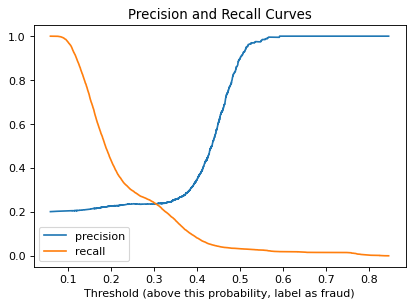

In [26]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, y_pred[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)')
plt.title('Precision and Recall Curves')

In [32]:
y_pred2 = y_pred[:,1]>0.3

print(f'Accuracy:\t{accuracy_score(y_test, y_pred2)}')
print(f'Precision:\t{precision_score(y_test, y_pred2, average="macro")}')
print(f'Recall:\t{recall_score(y_test, y_pred2, average="macro")}')
print(f'F1:\t{f1_score(y_test, y_pred2, average="macro")}')
confusion_matrix(y_test, y_pred2)

Accuracy:	0.69186
Precision:	0.5224424924588862
Recall:	0.522825
F1:	0.5226151458480693


array([[32182,  7818],
       [ 7589,  2411]])